## 2.1.1 -  Implement K-means clustering from scratch

In [253]:
def kmeans(img, k, iter ):
     """
    Segments the image
    -----
    args img: image to be segmented
    args k: number of clusters
    args iter: iteration numbers
    """
    w, h, ch = img.shape

    # Get image data points
    data_pts = img.reshape((w*h,ch))
    data_pts = np.float32(data_pts)
    
     # 1. Randomly select K centers
    # We do this by create a random array of RGB or GRAY values for each K 
    center = data_pts[np.random.randint(data_pts.shape[0], size=k)]
    
    # vectors to store calculated distance and assignment
    vect = np.zeros(data_pts.shape[0], dtype=np.float64)
    
    dist = np.zeros([data_pts.shape[0], k], dtype=np.float64)
   
    cluster_iter = []
    for i in range(iter):
        for i, j in enumerate(center):
            # Calculate euclidian distance
            # Assign each point to nearest cluster by calculating its distance to each center
            dist[:, i] = euclidian_distance(j, data_pts)

        # Adjust clusters based on minimal distance
        min_dist = np.argmin(dist, axis=1)
    

        # Adjust center of each cluster
        for c in range(k):
            center[c] = np.mean(data_pts[min_dist == c], 0)

            center_temp = np.uint8(center)
            cluster_tmp = center_temp[min_dist.flatten()]
            if(ch>1):
                cluster_tmp = cluster_tmp.reshape((w, h, ch))
            else:
                cluster_tmp = cluster_tmp.reshape((w, h))
            cluster_iter.append(cluster_tmp)

    # convert back to int
    center = np.uint8(center)
    
    # get clusters
    cluster = center[min_dist.flatten()]
    if(ch==1):
        cluster = cluster.reshape((w, h))
    else:
        cluster = cluster.reshape((w, h, ch))

    return cluster_iter

def euclidian_distance(center, data_pts):
    return np.linalg.norm(data_pts - center, axis=1)



### 2.1.1 - Applying K-means with K=2

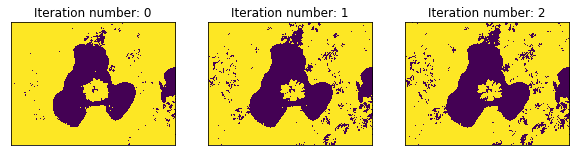

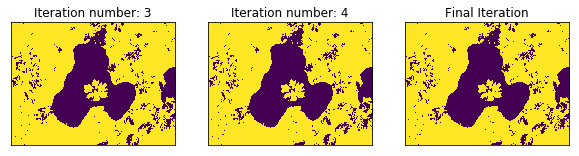

In [156]:
clusters = k_means(img, 2, 6)
show_figures(clusters)

### 2.1.1 - Applying K-means with K=3

In [332]:

# Euclidian distance
def euclidian_distance(centroid, data_pts):
    return np.linalg.norm(data_pts - centroid, axis=1)


def kmeans(img, k, iter ):
    """
    Segments the image
    -----
    args img: image to be segmented
    args k: number of clusters
    args iter: iteration numbers
    """
    w, h, ch = img.shape

    # Get image data points
    data_pts = img.reshape((w*h,ch))
    data_pts = np.float32(data_pts)
    
     # 1. Randomly select K centers
    # We do this by create a random array of RGB or GRAY values for each K 
    center = data_pts[np.random.randint(data_pts.shape[0], size=k)]
    
    # vectors to store calculated distance and assignment
    vect = np.zeros(data_pts.shape[0], dtype=np.float64)
    
    dist = np.zeros([data_pts.shape[0], k], dtype=np.float64)
   
    cluster_iter = []
    l=0
    for i in range(iter):
        for i, j in enumerate(center):
            # Calculate euclidian distance
            # Assign each point to nearest cluster by calculating its distance to each center
            dist[:, i] = euclidian_distance(j, data_pts)

        # Adjust clusters based on minimal distance
        min_dist = np.argmin(dist, axis=1)
    

        # Adjust center of each cluster
        for c in range(k):
            center[c] = np.mean(data_pts[min_dist == c], 0)
        
        # Store first 5 iterations
        center_temp = np.uint8(center)
        cluster_tmp = center_temp[min_dist.flatten()]
        if(ch>1):
            cluster_tmp = cluster_tmp.reshape((w, h, ch))
        else:
            cluster_tmp = cluster_tmp.reshape((w, h))
        cluster_iter.append(cluster_tmp)

    # convert back to int
    center = np.uint8(center)
    
    # get clusters
    cluster = center[min_dist.flatten()]
    if(ch==1):
        cluster = cluster.reshape((w, h))
    else:
        cluster = cluster.reshape((w, h, ch))


    return cluster_iter

def euclidian_distance(center, data_pts):
    return np.linalg.norm(data_pts - center, axis=1)

def show_plot(imgs, cols=3, isGray = False):  
    arr = [131, 132, 133]
    
    j=0
    for i in range(len(imgs)):
        if(i%3==0):
            plt.figure(figsize=(10,10))
            j=0
        plt.subplot(arr[j])
        plt.xticks([]), plt.yticks([])
        plt.imshow(imgs[i])
        j+=1
        if(i!=len(imgs)-1):
            plt.title("Iteration number: "+str(i))
            
    plt.title("Final Iteration")    
    plt.show()

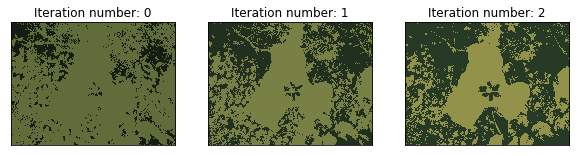

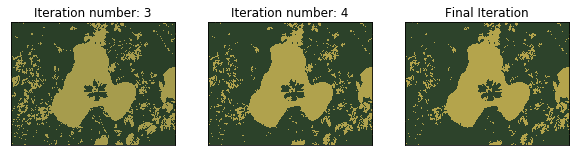

In [336]:
#Eread image 
img = cv2.imread('flower.jpg')

#convert to rgb, K=2
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

clusters_rgb = kmeans(img_rgb, 2, 6)
w,h,ch = img.shape
#clusters_rgb = kmeans(img_rgb, w,h,ch, 2, 10)[1]

show_plot(clusters_rgb)

### 2.1.1 - Applying K-means with grayscale and K=2

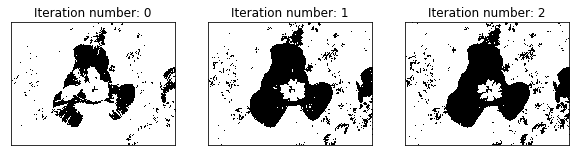

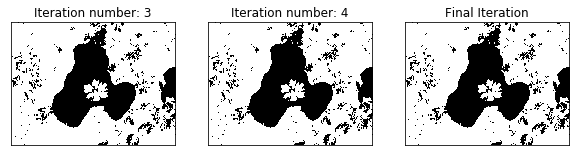

In [12]:
img_gray = cv2.imread("flower.jpg", cv2.COLOR_BGR2RGB)
img_gray = np.float32(img)
clusters = k_means(img_gray, 2, 6)
show_figures(clusters, isGray = True)

### 2.1.1 - Applying K-means with grayscale and K=3

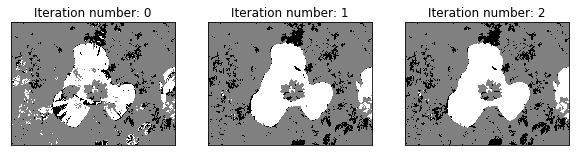

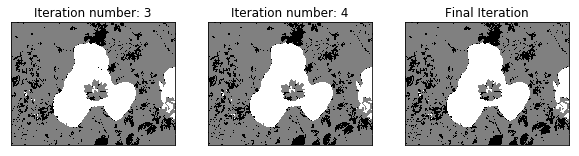

In [14]:
img_gray = cv2.imread("flower.jpg", cv2.COLOR_BGR2RGB)
img_gray = np.float32(img)
clusters = k_means(img_gray, 3, 6)
show_figures(clusters, isGray = True)

### 2.1.1 - Comparing segmenetation for color and gray-scale

In [7]:
# TODO : compare Color vs Gray scale


## 2.1.2 -  Implement EM-means clustering from scratch

In [15]:
import math

# prob(Pt | cluster i ) : Probability Density Function (PDF)
def prob_cluster(pixel, cent, std):
    """
    Calculate the probability of association between a point and a
    given Gaussian Distribution for each channel in a pixel.
    -----
    args pixel: the pixel. 
    args cent: the center of the Gaussian distribution. 
    args std: standard deviation OF Gaussian distribution. 
    -----
    returns: PDF of each gaussian K for one pixel. 
    """
    gauss_pdf = []
    for i in range(len(std)):
        point_pdf = []
        for j in range(len(pixel)):
            temp = 1/((math.sqrt(2*math.pi))*std[i][j]) * math.e**(-.5*math.pow((pixel[j]-cent[i][j])/std[i][j],2))
            point_pdf.append(temp)
        gauss_pdf.append(np.linalg.norm(point_pdf, axis=-1))  
    return gauss_pdf

def em(img, k, iterations=10):
    """
    Performs Expectation Maximization (EM) algorithm of an image 
    -----
    args img: the input image
    args k: the number of Gaussian Distributions
    args iterations: the number of iterations 
    -----
    """
    h, w, ch = img.shape
    
    if(k==1):
        raise Exception('K cannot be 1')
    
    # Randomly define a center for each K Gaussian components
    # This center will be the randomly initialized peak for the initial gaussian
    gaus_peak = np.random.random((k, ch)) * 255
    
    # Probability that a point is in a given gaussian K
    prob = np.full(k, (1/k))
    # STD of a point being in a given gaussian K
    std_gaus = np.full((k, ch), (255/k))

    iter_pdf = []
    for iter in range(iterations):
        # E-Step
        # Assign each point a probability of being in each K Gaussian
        pdf = np.empty(shape=(h, w, k))
        for row in range(h):
            for col in range(w):
                pdf[row][col] = prob_cluster(img[row][col], gaus_peak, std_gaus)
    
        # Normalize the distribution
        pixel_sum = np.sum(pdf * prob, axis=-1)
        pixel_sum = pixel_sum.reshape((h, w, 1))
        pdf = pdf / pixel_sum
    
        # Assign each pixel to a gaussian distribution
        cluster_groups = np.argmax(pdf, axis=-1)
        iter_pdf.append(cluster_groups)
        
        # M-Step
        # Recalculate the Gaussian Distributions with newly assigned points
        for distr in range(k):
            distr_sum = 0
            for i in range(h):
                for j in range(w):
                    distr_sum += pdf[i, j, distr] * img[i, j]
            
            gaus_peak[distr] = distr_sum / np.sum(pdf[:,:,distr])
            curr_cluster = img[cluster_groups==distr]
            std_gaus[distr] = np.sqrt(np.var(curr_cluster, axis=0))
            pdf[distr] = np.size(curr_cluster) / np.size(img)
    
    return iter_pdf

### 2.1.2 - Applying EM with K=2

In [17]:
img = cv2.imread("flower.jpg", cv2.COLOR_BGR2RGB)
img = np.float32(img)

em_gaussian2 = em(img, 2, 6)
#show_figures(em_gaussian2)

### 2.1.2 - Applying EM with K=3

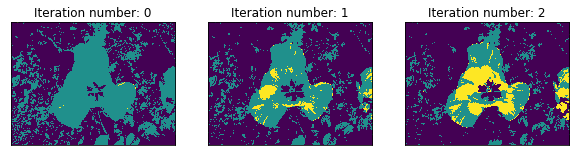

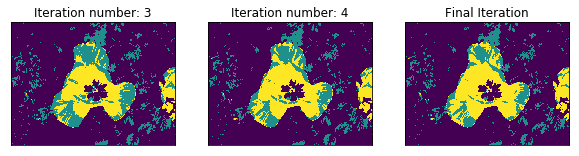

In [41]:
em_gaussian3 = em(img, 3, 6)
show_figures(em_gaussian3)

### 2.1.2 - Applying EM with Grayscale and K=2

In [ ]:
img_gray = cv2.imread("flower.jpg", cv2.COLOR_BGR2GRAY)
img_gray = np.float32(img_gray)

em_gray_2 = em(img_gray, 2, 6)
show_figures(em_gray_2)

### 2.1.2 - Applying EM with Grayscale and K=3 

In [ ]:
em_gray_3 = em(img_gray, 3, 6)
show_figures(em_gray_3)

In [ ]:
k = 2
ch = 3

# Gaus peaks (centers)
gaus_peak = np.random.random((k, ch)) * 255
# Probability that a point is in a given gaussian K
prob_gaus = np.full(k, (1/k))
# STD of a point being in a given gaussian K
std_gaus = np.full((k, ch), (255/k))

print("Probability Peaks", gaus_peak)
print("Probability Gaussian", prob_gaus)
print("STD Gaussian", std_gaus)

In [ ]:
k = 2

gaus_peaks = [[208.26710226, 235.0362611,  210.2826962],
              [62.51236031,  67.88919874, 207.86393764]]
PDF = [0.5, 0.5]
#STD = [[127.5, 127.5, 127.5],
        #[127.5, 127.5, 127.5]]
STD = [[100, 2, 3],
        [400, 5, 6]]
pixel = [32.3, 44.3, 59.2]

prob_cluster(pixel, gaus_peaks, STD)


In [ ]:
exp = [
        [[0.5, 0.6443], [0.3323, 0.322]], # 1st row
        [[0.63, 0.61], [0.22, 0.112]], # 2nd row
    ]
PDF = np.array([10, 1])

k = 2
h = 2
w = 2
tst = np.empty(shape=(h, w, k))

denom = np.sum(exp * PDF, axis=-1)
print(denom)
denom = denom.reshape((h, w, 1))
print(denom)
exp = exp / denom
print(exp)



#denom = denom.reshape((h, w, 1))
#exp = exp / denom

In [ ]:
gauss_pdf = []
    for j in range(len(pixel)):
        point_pdf = []
        for i in range(len(std)):
            print('pixel', pixel[j])
            print('STD',std[i][j])
            print('Center',cent[i][j])
            temp = 1/((math.sqrt(2*math.pi))*std[i][j]) * math.e**(-.5*math.pow((pixel[j]-cent[i][j])/std[i][j],2))
            point_pdf.append(temp)
    return point_pdf

In [ ]:
img = cv2.imread("flower.jpg", cv2.COLOR_BGR2RGB)
img = np.float32(img)

def show_plot(imgs):
    length = len(imgs)
    arr = [131, 132, 133]
    
    plt.figure(figsize=(10,10))
    j = 0
    for img in imgs:
        if(j%3==0):
            plt.figure(figsize=(10,10))
            j=0
        plt.subplot(arr[j])
        plt.imshow(img)
        j+=1
    plt.show()
    

imgs = []
for i in range(10):
    imgs.append(img)
    
show_plot(imgs)


In [ ]:
def k_means_data_points(data, k, iter_n):
    """
    Segments the image
    -----
    args img: image to be segmented
    args k: number of clusters
    args iter: iteration numbers
    """
    height, width = data.shape
    
    # 1. Randomly select K centers
    centers = np.random.random_sample((k, 2))*10

    cluster_iter = []
    for i in range(iter_n):
        # 2. Assign each point to the nearest cluster
        # Calculate distance between each point and each center
        distance = np.zeros((k, height))
        for i in range(0, height):
            for j in range(k):
                distance[j][i] = math.sqrt(
                    (centers[j][0] - data[i][0])**2 + (centers[j][1] - data[i][1])**2
                )

        # 2. Assign each point to the nearest cluster
        cluster = np.zeros(height)
        for i in range(len(distance[0])):
            if(distance[0][i] > distance[1][i]):
                cluster[i] = 0
            else:
                cluster[i] =1
        
        cluster_iter.append(cluster)

        # 3. and Compute new mean for each cluster 
        centers = compute_mean(cluster, height, k)

    return cluster_iter, centers

"""
Following code generates datapoints for question 1.1 part 3.
"""
data = np.float32(
    np.vstack((
        np.random.normal(
            loc = np.array([5,5]),
            scale = np.array([3,2]),
            size = (1000, 2)),
        np.random.normal(
            loc = np.array([-5, -5]),
            scale = np.array([5, 1]),
            size = (1000, 2)
        ))))
   
test, centers = k_means_data_points(data, k=2, iter_n=5)
test = test[4]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(data[:,0], data[:,1],"ko")
plt.title("Data points")

plt.subplot(122)

red_x = []
red_y = []
blue_x = []
blue_y = []

for i in range(2000):
    if(test[i] == 0):
        red_x.append(data[i,0])
        red_y.append(data[i,1])
    elif(test[i] == 1):
        blue_x.append(data[i,0])
        blue_y.append(data[i,1]) 
    
plt.scatter(red_x, red_y, color='r')
plt.scatter(blue_x, blue_y, color='b')
plt.scatter((centers[0][0], centers[1][0]), (centers[0][1], centers[1][1]), s=80, color='y', marker='*')
plt.title("Data points - Labeled")
plt.show()

#em(data, k=2, iterations = 5)

#distance[j][i] = np.argmin(distance[], axis=0)


DATA:
[[  3.0430636   3.4464607]
 [  4.6915812   2.4990325]
 [  3.9146636   4.7886043]
 [  1.9891754   1.0638087]
 [ -4.6918697  -5.2456555]
 [ -3.3276746  -4.6090813]
 [ -8.141927   -4.6693363]
 [-11.462214   -4.8630342]]
********************
GAUS_PEAKS:
[[1.14891325 0.54253917]
 [3.2276777  1.54563786]]
********************
pdf  0.0006103959060988678
data 3.0430636
pdf  0.00037765719570741815
data 3.4464607
pdf  0.0006103959060988678
data 4.6915812
pdf  0.00037765719570741815
data 2.4990325
pdf  0.0006103959060988678
data 3.9146636
pdf  0.00037765719570741815
data 4.7886043
pdf  0.0006103959060988678
data 1.9891754
pdf  0.00037765719570741815
data 1.0638087
pdf  0.0006103959060988678
data -4.6918697
pdf  0.00037765719570741815
data -5.2456555
pdf  0.0006103959060988678
data -3.3276746
pdf  0.00037765719570741815
data -4.6090813
pdf  0.0006103959060988678
data -8.141927
pdf  0.00037765719570741815
data -4.6693363
pdf  0.0006103959060988678
data -11.462214
pdf  0.00037765719570741815
d

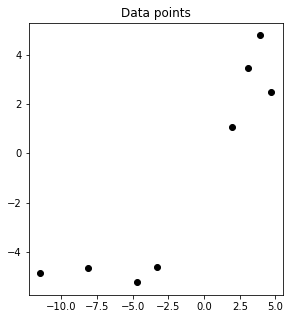

In [337]:
data = np.float32(
        np.vstack((
            np.random.normal(
                loc=np.array([5, 5]),
                scale=np.array([3, 2]),
                size=(4, 2)),
            np.random.normal(
                loc=np.array([-5, -5]),
                scale=np.array([5, 1]),
                size=(4, 2)
            ))))

print('DATA:')
print(data)
print('*'*20)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(data[:, 0], data[:, 1], "ko")
plt.title("Data points")

def prob_cluster(pixel, cent, std):
    """
    Calculate the probability of association between a point and a
    given Gaussian Distribution for each channel in a pixel.
    -----
    args pixel: the pixel. 
    args cent: the center of the Gaussian distribution. 
    args std: standard deviation OF Gaussian distribution. 
    -----
    returns: PDF of each gaussian K for one pixel. 
    """
    gauss_pdf = []
    # iterate over each gaussian distribution
    for i in range(len(std)):
        point_pdf = []
        # iterate over each point x,y
        for j in range(len(pixel)):
            temp = 1/((math.sqrt(2*math.pi))*std[i][j]) * math.e**(-.5*math.pow((pixel[j]-cent[i][j])/std[i][j],2))
            point_pdf.append(temp)
        gauss_pdf.append(np.linalg.norm(point_pdf, axis=-1))  
    return gauss_pdf

def em(data, k, iter=5):
    ch = 2
    h, w = data.shape

    # Randomly define a center for each K Gaussian components
    # This center will be the randomly initialized peak for the initial gaussian (x,y) for each K
    gaus_peak = np.random.random((k, ch)) * 5.0
    print('GAUS_PEAKS:')
    print(gaus_peak)
    print('*'*20)
    
    # Probability that a point is in a given gaussian K
    prob = np.full(k, (1.0 / k))
    # STD of each point (x,y) being in a given gaussian K
    std_gaus = np.full((k, ch), (1.0 / k))


    # E-Step
    # Assign each point a probability of being in each K Gaussian
    pdf = []
    for row in range(h):
        pdf.append(prob_cluster(data[row], gaus_peak, std_gaus))
        #pdf[row] = prob_cluster(data[row], gaus_peak, std_gaus)
        #print(data[row])
            #print(data[row][col])
            #pdf[row][col] = prob_cluster(data[row][col], gaus_peak, std_gaus)
    
    # Assign each point to the nearest cluster
    cluster = np.zeros(h)
    for i in range(len(pdf)):
        if(pdf[i][0] > pdf[i][1]):
            cluster[i] = 0
        else:
            cluster[i] =1
            
    # M-Step
    # Recalculate the Gaussian Distributions with newly assigned points
    # PDF : 2,2000
    pdf_reshaped = np.reshape(pdf, (len(pdf),2))
    pdf_center_1 = pdf_reshaped[:,0]
    pdf_center_2 = pdf_reshaped[:,1]
    for i in range(h):
        for distr in range(k):
            #distr_sum_x = 0
            print('pdf ',pdf_center_1[distr])
            print('data', data[i][distr])
           
            
    #for distr in range(k):
        #distr_sum = 0
        #for i in range(h):
            #if(distr==0):
               # distr_sum_x += pdf[i][distr]*data[i][distr]
            #elif(distr==1):
                # distr_sum_y += pdf[i][distr]*data[i][distr]
            
            
            #distr_sum += pdf[i][distr]*data[i][distr]
        #print('did this')
        #gaus_peak[distr] = 3
            #x = distr_sum / np.sum(pdf[:,distr])
            
            #print()
            #distr_sum += pdf[i, j, distr] * data[i, j]
        #gaus_peak[distr] = distr_sum / np.sum(pdf[:,distr])

        
    return pdf
    

x = em(data, k=2, iter=5)

print('*'*25)
print('RETURN:')
print(x)

In [ ]:

def k_means(img, k, iter_n):
    """
    Segments the image
    -----
    args img: image to be segmented
    args k: number of clusters
    args iter: iteration numbers
    """
    height, width, ch = img.shape
    
    # 1. Randomly select K centers
    # We do this by create a random array of RGB or GRAY values for each K 
    centers = np.random.random_sample((k, ch))*255
    
    cluster_iter = []
    for i in range(iter_n):
        # 2. Assign each point to the nearest cluster
        # Arr shape = (K, height, width), where K is cluster group
        clusters = calc_distance(img, centers)
        cluster_iter.append(clusters)
        
        # 3. Compute new mean for each cluster 
        new_centers = np.empty(shape=(k, ch))
        for j in range(k):
            np.mean(img[clusters[0]==j], axis=0, out=new_centers[j])
            
        # If new centers and centers are the same, exit iteration
        if((centers == new_centers).all()):
            break
        else:
            centers = new_centers
            
    return cluster_iter
    
def calc_distance(points, centers):
    """
    Calculates the eucilidean distance between points and center
    -----
    args points: the points 
    args centers: the centers of the distributions
    """
    dists = []
    # Calculate the distance between each point and each center
    for center in centers:
        dists.append([points - center])
    dists = np.linalg.norm(dists, axis=-1)
    
    # Return closest center of each point
    return np.argmin(dists, axis=0)
   
def show_plot(imgs, cols=3, isGray = False):  
    for i in range(len(imgs)):
        plt.figure(figsize=(20, 4))
        if(i==5):
            plt.title("Final Iteration")
        else:
            plt.title("Iteration number: "+str(i))
        plt.axis('off')
        if(isGray):
            plt.imshow(imgs[i][0].astype(np.uint8), cmap='gray')
        else:
            plt.imshow(imgs[i][0].astype(np.uint8))
        plt.show()